<a href="https://colab.research.google.com/github/giovannizinzi/gio/blob/master/speaker_diarization_with_pyannotat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pyannote.audio==1.1

     |████████████████████████████████| 230 kB 14.7 MB/s 
     |████████████████████████████████| 41 kB 352 kB/s 
     |████████████████████████████████| 59 kB 9.2 MB/s 
     |████████████████████████████████| 49 kB 7.2 MB/s 
     |████████████████████████████████| 130 kB 53.3 MB/s 
     |████████████████████████████████| 308 kB 62.8 MB/s 
     |████████████████████████████████| 209 kB 72.0 MB/s 
     |████████████████████████████████| 80 kB 12.8 MB/s 
     |████████████████████████████████| 75 kB 6.1 MB/s 
     |████████████████████████████████| 149 kB 74.1 MB/s 
     |████████████████████████████████| 112 kB 47.3 MB/s 
     |████████████████████████████████| 49 kB 7.9 MB/s 


In [ ]:
import google.colab
from pyannote.core import Segment, notebook
from pyannote.audio.features import RawAudio
from IPython.display import Audio

# File used can be found here: http://groups.inf.ed.ac.uk/ami/AMICorpusMirror/amicorpus/ES2004a/audio/ES2004a.Mix-Headset.wav

audioFile = '/content/ES2004a.Mix-Headset.wav'
# i hope u respect the naming conventions
AUDIOfile = {'audio': audioFile}
notebook.reset()

# load audio waveform and play it
waveform = RawAudio(sample_rate=16000)(OWN_FILE).data
Audio(data=waveform.squeeze(), rate=16000, autoplay=True)

Note from author - nless you provide a groundtruth annotation, you will (obviously) not be able to visualize groundtruth annotation nor evaluate the performance of the diarization pipeline quantitatively

In [ ]:
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia')
diarization = pipeline(AUDIOfile)

Downloading: "https://github.com/pyannote/pyannote-audio/archive/master.zip" to /root/.cache/torch/hub/master.zip


  0%|          | 0.00/901 [00:00<?, ?B/s]

  0%|          | 0.00/1.49k [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


  0%|          | 0.00/2.41M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


  0%|          | 0.00/2.40M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


  0%|          | 0.00/16.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning:

The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release

/usr/local/lib/python3.7/dist-packages/pyannote/audio/features/pretrained.py:156: UserWarning:

Model was trained with 4s chunks and is applied on 2s chunks. This might lead to sub-optimal results.

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


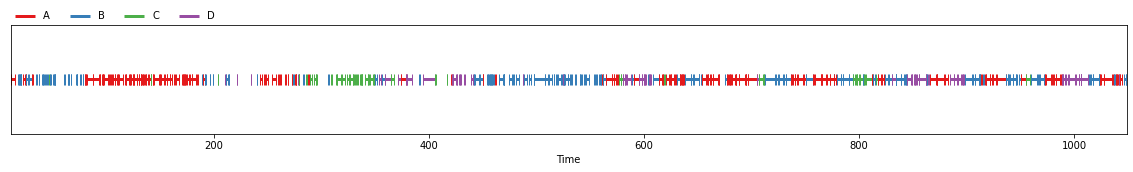

In [ ]:
diarization

Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


  0%|          | 0.00/2.41M [00:00<?, ?B/s]

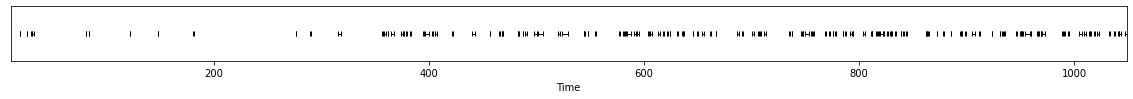

In [ ]:
overlap_detection = torch.hub.load('pyannote/pyannote-audio', 'ovl_ami', pipeline=True)
overlap_detection(OWN_FILE).get_timeline()